### EDA : Feature Engineering . Scaling
    Why are the Transformations required?
        1) Linear Regression -- Gradient Descent -- Global Minima
        2) Algorithms like KNN, K Means, hierarchial CLustering -- Euclidean Distance
##### Every point has some vectors, containing magnitude and Direction
        p1 = (x1,y1)= (24,54)
        p2 = (x2,y2)= (30,50)
##### Transformation techniques (Standardization or Scaling) 
    a) are not required in Ensemble methods, e.g., Decision Tree.
    b) are Required in Deep Learning Techniques:
        1) ANN --> Global Minima,  Gradient,
        2) CNN,
        3) RNN

# Types of Transformation
### 1) Normalization and Standardization
### 2) Scaling to Minimum and Maximum Values
        Used popularly for CNN
### 3) Scaling to Median and Quantiles
### 4) Guassian Transformation
      ##### a)  Logarithmic Transformation
      ##### b)  Reciprocal Transformation
      ##### c)  Square Root Transformation
      ##### d)  Exponential Transformation
      ##### e)  Box Cox Transformation

# 3) Scaling to Median and Quantiles: Robust Scaler
    Aim: Scale the features to Median and Quantiles
    Formula: X_scaled = (X - X.median) / IQR
    
    IQR = InterQuartile Range
    IQR = 75th percentile - 25th Percentile

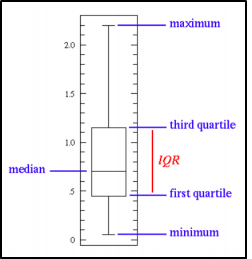

##### 0,1,2,3,4,5,6,7,8,9
    9 = 90th percentile = 90% of all values in this group is less than 9
    1 = 10th percentile = 10% of all values in this group is less than 1
    4 = 40th percentile = 40% of all values in this group is less than 4

In [1]:
import pandas as pd

# focussing on Features with Numerical Values
df = pd.read_csv('titanic_train.csv',usecols=['Survived','Pclass','Age','Fare'])
df
# values in "Survived" are only 0 and 1, So "Survived" columns / feature does not need Scaling

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [2]:
# replacing Nan / null values with Median
df['Age'].fillna(df.Age.median(),inplace=True)
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


In [3]:
from sklearn.preprocessing import RobustScaler
Robust = RobustScaler()  # transforming / Scaling the data

# converting it in dataframe
df_Robust = pd.DataFrame(Robust.fit_transform(df),columns=df.columns)
df_Robust # Scaled Dataset

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


In [4]:
# plotting charts
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 20 artists>)

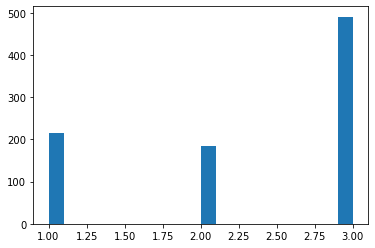

In [5]:
# plotting Histogram for Non-Standardized Data
plt.hist(df['Pclass'],bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

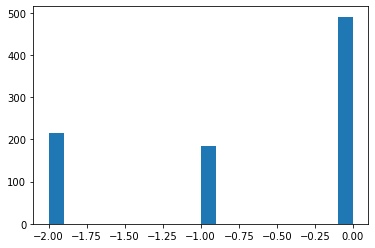

In [6]:
# plotting Histogram for SCALED Data
plt.hist(df_Robust['Pclass'],bins=20)
# Same Distribution, but Scale changed from (1:3) to (-2:0)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

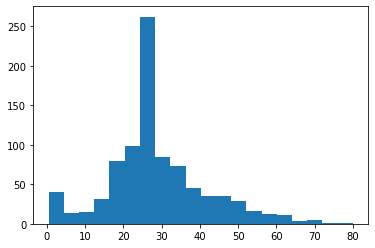

In [7]:
# plotting Histogram for Non-Standardized Data
plt.hist(df['Age'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

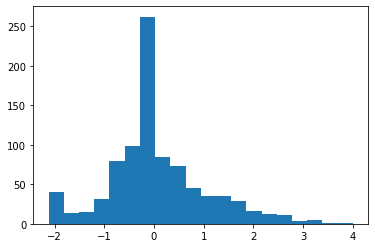

In [8]:
# plotting Histogram for SCALED Data
plt.hist(df_Robust['Age'],bins=20)
# Same Distribution, but Scale changed from (0:80) to (-2:4)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

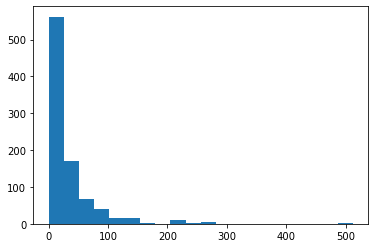

In [9]:
# plotting Histogram for Non-Standardized Data
plt.hist(df['Fare'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

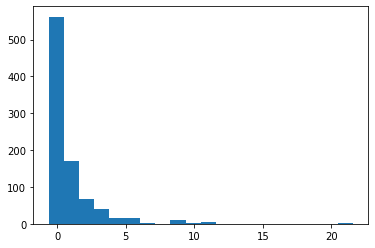

In [10]:
# plotting Histogram for SCALED Data
plt.hist(df_Robust['Fare'],bins=20)
# Same Distribution, but Scale changed from (0:500) to (-2:22)

In [11]:
# Scaling is Not required for Decision Trees